In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

In [20]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [21]:
dataset=pd.read_csv('/content/drive/My Drive/TabulareDM_2/nuovo_dataset_totale.csv')

In [22]:
dataset

,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,...,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_bars,genre,popularity_artist
0,4rjA5kJJWbwU1prXCvg6Fk,Grey,1.0,290.48,False,52.0,5.0,Kölsch,album,1989,...,0.24,186.00,3.0,0.02,1.00,0.50,0.52,234.0,minimal-techno,[51.0]
1,6xzpUzzIquIyUzTLbbgSdI,Thrown,1.0,539.23,False,45.0,5.0,Kiasmos,album,Kiasmos,...,0.14,120.02,4.0,0.68,0.33,0.41,0.59,269.0,minimal-techno,[47.0]
2,56tXgHlSHCfgmGhwVXNizc,Routine,1.0,264.20,False,39.0,5.0,Joris Delacroix,album,Night Visions,...,0.32,118.05,3.0,0.85,0.46,0.90,0.76,171.0,minimal-techno,[44.0]
3,0s3wIBczp6TdSJ2y8cveJl,Confronted - Anfisa Letyago Stranger Remix,1.0,387.41,False,0.0,6.0,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,...,0.04,128.99,4.0,0.88,0.50,0.51,0.50,207.0,minimal-techno,"[36.0, 40.0]"
4,4PSbDDd1LRYMhqPXvza6I2,Jupiter Sunrise,1.0,248.96,False,0.0,1.0,Kollektiv Turmstrasse,compilation,10 Years Diynamic,...,0.12,120.00,4.0,0.88,1.00,0.47,0.46,123.0,minimal-techno,[45.0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109144,0wiDjWz3U1WfwXSrWHXe2b,I'm Good (Blue) - REAPER Extended Remix,1.0,209.66,True,23.0,2.0,David Guetta;Bebe Rexha;REAPER,single,I'm Good (Blue) [REAPER Remix],...,0.37,173.96,4.0,0.73,1.00,0.09,0.18,145.0,edm,"[86.0, 79.0, 50.0]"
109145,46n9OJc7LOIVdj8t2l5WA5,End Of The Night,1.0,205.72,True,56.0,1.0,Danny Avila,single,End Of The Night,...,0.31,99.97,4.0,0.71,1.00,0.40,0.54,84.0,edm,[47.0]
109146,127uq83uGFapbddqiMUKky,Sexy Bitch (feat. Akon),1.0,195.85,True,80.0,3.0,David Guetta;Akon,album,One More Love,...,0.80,130.01,4.0,0.81,0.99,0.10,0.33,106.0,edm,"[86.0, 79.0]"
109147,0ZdUHFxifUJNqo7G4aJzoF,Savannah,1.0,208.70,False,60.0,1.0,Diviners;Philly K.,single,Savannah,...,0.39,108.07,4.0,0.65,1.00,0.55,0.60,89.0,edm,"[47.0, 38.0]"


In [23]:
# Funzione per trasformare le stringhe in liste di float
def trasforma_in_lista(lst_str):
    # Rimuovi i caratteri '[' e ']' e splitta la stringa
    lst_str = lst_str.strip('][').split(', ')
    # Utilizza eval per valutare la lista di stringhe e convertirla in una lista di float
    return [float(x) for x in lst_str]

# Applica la funzione a ciascun valore nella colonna
dataset['popularity_artist'] = dataset['popularity_artist'].apply(trasforma_in_lista)

# Calcola la media di ciascuna lista
dataset['popularity_artist'] = round(dataset['popularity_artist'].apply(np.mean),2)


In [24]:
dataset=dataset.drop(['id'], axis=1)

In [25]:
dataset

,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,album_release_date,...,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_bars,genre,popularity_artist
0,Grey,1.0,290.48,False,52.0,5.0,Kölsch,album,1989,2017-09-22,...,0.24,186.00,3.0,0.02,1.00,0.50,0.52,234.0,minimal-techno,51.00
1,Thrown,1.0,539.23,False,45.0,5.0,Kiasmos,album,Kiasmos,2014-10-27,...,0.14,120.02,4.0,0.68,0.33,0.41,0.59,269.0,minimal-techno,47.00
2,Routine,1.0,264.20,False,39.0,5.0,Joris Delacroix,album,Night Visions,2018-06-22,...,0.32,118.05,3.0,0.85,0.46,0.90,0.76,171.0,minimal-techno,44.00
3,Confronted - Anfisa Letyago Stranger Remix,1.0,387.41,False,0.0,6.0,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,2019-12-06,...,0.04,128.99,4.0,0.88,0.50,0.51,0.50,207.0,minimal-techno,38.00
4,Jupiter Sunrise,1.0,248.96,False,0.0,1.0,Kollektiv Turmstrasse,compilation,10 Years Diynamic,2016-09-16,...,0.12,120.00,4.0,0.88,1.00,0.47,0.46,123.0,minimal-techno,45.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109144,I'm Good (Blue) - REAPER Extended Remix,1.0,209.66,True,23.0,2.0,David Guetta;Bebe Rexha;REAPER,single,I'm Good (Blue) [REAPER Remix],2022-10-21,...,0.37,173.96,4.0,0.73,1.00,0.09,0.18,145.0,edm,71.67
109145,End Of The Night,1.0,205.72,True,56.0,1.0,Danny Avila,single,End Of The Night,2018-11-16,...,0.31,99.97,4.0,0.71,1.00,0.40,0.54,84.0,edm,47.00
109146,Sexy Bitch (feat. Akon),1.0,195.85,True,80.0,3.0,David Guetta;Akon,album,One More Love,2010-11-22,...,0.80,130.01,4.0,0.81,0.99,0.10,0.33,106.0,edm,82.50
109147,Savannah,1.0,208.70,False,60.0,1.0,Diviners;Philly K.,single,Savannah,2015-11-25,...,0.39,108.07,4.0,0.65,1.00,0.55,0.60,89.0,edm,42.50


In [26]:
# Define the list of genres
genres_to_filter = ['sertanejo', 'folk', 'j-idol', 'world-music', 'songwriter',
                    'progressive-house', 'heavy-metal', 'mpb', 'opera', 'minimal-techno',
                    'new-age', 'sleep', 'emo', 'kids', 'honky-tonk', 'synth-pop',
                    'goth', 'happy', 'salsa', 'piano']

# Filter the dataset based on the 'genre' column
filtered_df = dataset[dataset['genre'].isin(genres_to_filter)]

In [27]:
filtered_df['genre'].unique()

array(['minimal-techno', 'honky-tonk', 'j-idol', 'sleep', 'songwriter',
       'synth-pop', 'world-music', 'emo', 'folk', 'goth', 'happy',
       'heavy-metal', 'progressive-house', 'salsa', 'sertanejo', 'mpb',
       'new-age', 'kids', 'opera', 'piano'], dtype=object)

In [35]:
filtered_df

,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,album_release_date,...,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_bars,genre,popularity_artist
0,Grey,1.0,290.48,False,52.0,5.0,Kölsch,album,1989,2017-09-22,...,0.24,186.00,3.0,0.02,1.00,0.50,0.52,234.0,minimal-techno,51.0
1,Thrown,1.0,539.23,False,45.0,5.0,Kiasmos,album,Kiasmos,2014-10-27,...,0.14,120.02,4.0,0.68,0.33,0.41,0.59,269.0,minimal-techno,47.0
2,Routine,1.0,264.20,False,39.0,5.0,Joris Delacroix,album,Night Visions,2018-06-22,...,0.32,118.05,3.0,0.85,0.46,0.90,0.76,171.0,minimal-techno,44.0
3,Confronted - Anfisa Letyago Stranger Remix,1.0,387.41,False,0.0,6.0,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,2019-12-06,...,0.04,128.99,4.0,0.88,0.50,0.51,0.50,207.0,minimal-techno,38.0
4,Jupiter Sunrise,1.0,248.96,False,0.0,1.0,Kollektiv Turmstrasse,compilation,10 Years Diynamic,2016-09-16,...,0.12,120.00,4.0,0.88,1.00,0.47,0.46,123.0,minimal-techno,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99492,Draw A Crowd,1.0,254.35,False,30.0,6.0,Ben Folds Five,album,The Sound Of The Life Of The Mind,2012-09-18,...,0.68,112.21,4.0,0.84,1.00,0.43,0.57,117.0,piano,43.0
99493,Father in Heaven,2.0,147.63,False,29.0,8.0,Paul Cardall,album,40 Hymns for Forty Days,2015-04-14,...,0.04,76.49,4.0,0.28,0.11,0.55,0.66,46.0,piano,48.0
99494,Baby Lullaby,1.0,188.00,False,30.0,11.0,Piano Peace,album,Baby Lullaby Piano Sleep Music,2017-03-10,...,0.14,69.49,5.0,0.26,0.62,0.85,0.87,78.0,piano,61.0
99495,Young Man's Fancy,1.0,231.58,False,19.0,14.0,George Winston,album,Linus & Lucy - The Music of Vince Guaraldi,1996-09-07,...,0.06,76.22,4.0,0.09,0.82,0.31,0.41,67.0,piano,47.0


In [36]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y=label_encoder.fit_transform(filtered_df["genre"])

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
X=filtered_df.drop(['name', 'artists', 'disc_number','album_type', 'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'album_name', 'genre'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=72, stratify=y)



In [38]:
X_train.shape

(15929, 22)

## Standardizzazione

In [39]:
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()
norm.fit(X)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

## Gradient Boosting

In [40]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [41]:
import warnings
# Ignorare tutti i warning
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from scipy.stats import uniform, randint

# Definire l'intervallo di iperparametri da esplorare
param_distributions = {
    'n_estimators': randint(50, 60),
    'learning_rate': uniform(0.01, 1),
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'subsample': uniform(0.0, 1), #0.5, 0.5
    'max_features': [ 'sqrt', 'log2', None]
}

# Configurare RandomizedSearchCV
clf = GradientBoostingClassifier(random_state=0)
random_search = RandomizedSearchCV(clf, param_distributions, n_iter=20, scoring='accuracy', cv=5, random_state=42, n_jobs=-1)

# Eseguire la ricerca casuale
random_search.fit(X_train_norm, y_train)

# Stampare i migliori parametri trovati
print(f'Migliori parametri trovati: {random_search.best_params_}')

# Addestrare il modello con i migliori parametri trovati
best_clf = random_search.best_estimator_
best_clf.fit(X_train_norm, y_train)

# Previsioni e valutazione del modello
y_pred = best_clf.predict(X_test_norm)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Migliori parametri trovati: {'learning_rate': 0.06808361216819946, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 57, 'subsample': 0.6508884729488529}
Accuracy 0.6987195581220186
F1-score [0.67700258 0.35097493 0.52256532 0.83204134 0.72422062 0.84895833
 0.77149877 0.825      0.85714286 0.56689342 0.63235294 0.61139896
 0.68523677 0.77581864 0.79901961 0.79104478 0.91089109 0.54457831
 0.58097686 0.65656566]
              precision    recall  f1-score   support

           0       0.70      0.66      0.68       200
           1       0.39      0.32      0.35       197
           2       0.50      0.55      0.52       200
           3       0.86      0.81      0.83       200
           4       0.70      0.76      0.72       200
           5       0.87      0.83      0.85       196
           6       0.76      0.79      0.77       200
           7       0.82      0.83      0.82       198
           8       0.85      0.86      0.86 

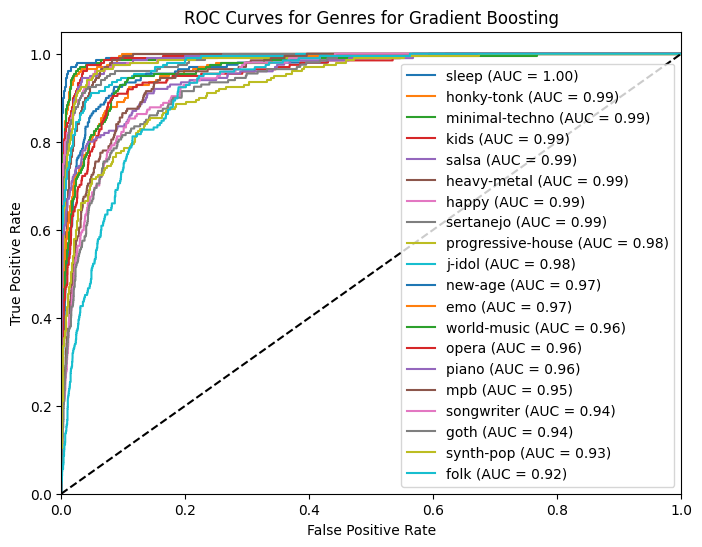

In [42]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Ottieni le probabilità predette invece delle etichette predette
y_pred_prob = best_clf.predict_proba(X_test_norm)

# Supponendo che label_encoder sia l'oggetto LabelEncoder utilizzato per codificare le etichette
class_names = label_encoder.inverse_transform(best_clf.classes_)

# Calcola le curve ROC e gli AUC per ogni classe
roc_data = []
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    roc_data.append((class_names[i], fpr, tpr, roc_auc))

# Ordina i dati ROC per valore inverso della ROC AUC (dal più alto al più basso)
roc_data_sorted = sorted(roc_data, key=lambda x: x[3], reverse=True)

# Traccia le curve ROC ordinate
plt.figure(figsize=(8, 6))
for class_name, fpr, tpr, roc_auc in roc_data_sorted:
    plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')

# Linea di riferimento casuale
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Genres for Gradient Boosting')
plt.legend(loc="lower right")
plt.show()


In [43]:
best_params=random_search.best_params_

In [44]:
gb=GradientBoostingClassifier(**best_params, random_state=0)

In [45]:
gb.fit(X_train_norm, y_train)

GradientBoostingClassifier(learning_rate=0.06808361216819946, max_depth=8,
                           max_features='sqrt', min_samples_leaf=4,
                           min_samples_split=9, n_estimators=57, random_state=0,
                           subsample=0.6508884729488529)

In [46]:
gb.score(X_train_norm, y_train)

0.9726285391424446

In [47]:
random_search.best_score_

0.6972817103083446

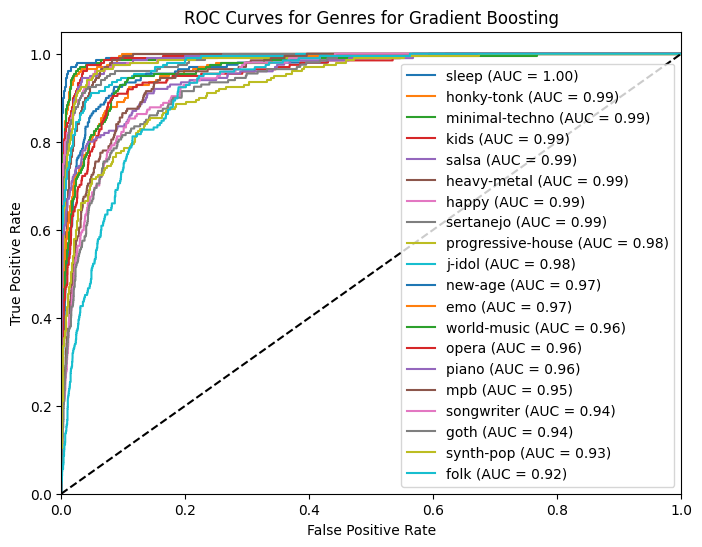

In [50]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Ottieni le probabilità predette invece delle etichette predette
y_pred_prob = gb.predict_proba(X_test_norm)

# Supponendo che label_encoder sia l'oggetto LabelEncoder utilizzato per codificare le etichette
class_names = label_encoder.inverse_transform(gb.classes_)

# Calcola le curve ROC e gli AUC per ogni classe
roc_data = []
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    roc_data.append((class_names[i], fpr, tpr, roc_auc))

# Ordina i dati ROC per valore inverso della ROC AUC (dal più alto al più basso)
roc_data_sorted = sorted(roc_data, key=lambda x: x[3], reverse=True)

# Traccia le curve ROC ordinate
plt.figure(figsize=(8, 6))
for class_name, fpr, tpr, roc_auc in roc_data_sorted:
    plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')

# Linea di riferimento casuale
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Genres for Gradient Boosting')
plt.legend(loc="lower right")
plt.show()


In [49]:
random_search.best_score_

0.6972817103083446

## XGBoost

In [51]:
from xgboost import XGBClassifier

In [52]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report
from scipy.stats import uniform, randint

# Definizione del modello
clf = XGBClassifier(objective='multi:softprob',use_label_encoder=False, random_state=42)

# Definizione dell'intervallo di iperparametri da esplorare
param_distributions = {
    'max_depth': randint(1, 10),
    'learning_rate': uniform(0.3),
    'gamma': uniform(0.0, 1.0),
    'reg_lambda': uniform(0.0, 1.0),
    'tree_method': ['auto', 'hist', 'exact', 'approx']
}

# Configurazione di RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_distributions, n_iter=20, scoring='accuracy', cv=5, random_state=42, n_jobs=-1)

# Esecuzione della ricerca casuale
random_search.fit(X_train_norm, y_train)

# Stampa dei migliori parametri trovati
print(f'Migliori parametri trovati: {random_search.best_params_}')

# Addestramento del modello con i migliori parametri trovati
best_clf = random_search.best_estimator_
best_clf.fit(X_train_norm, y_train)
y_pred = best_clf.predict(X_test_norm)
# Inverti il label encoding per le previsioni

y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Previsioni e valutazione del modello
print('Accuracy:', accuracy_score(y_test_labels, y_pred_labels))
print('F1-score:', f1_score(y_test_labels, y_pred_labels, average=None))
print(classification_report(y_test_labels, y_pred_labels))


Migliori parametri trovati: {'gamma': 0.13949386065204183, 'learning_rate': 0.5921446485352182, 'max_depth': 3, 'reg_lambda': 0.38246199126716274, 'tree_method': 'approx'}
Accuracy: 0.7117750439367311
F1-score: [0.69072165 0.38728324 0.5202864  0.84574468 0.75544794 0.88946015
 0.76235294 0.85063291 0.86432161 0.54954955 0.66666667 0.66830467
 0.71934605 0.76167076 0.8019802  0.78518519 0.90909091 0.52941176
 0.58730159 0.68148148]
                   precision    recall  f1-score   support

              emo       0.71      0.67      0.69       200
             folk       0.45      0.34      0.39       197
             goth       0.50      0.55      0.52       200
            happy       0.90      0.80      0.85       200
      heavy-metal       0.73      0.78      0.76       200
       honky-tonk       0.90      0.88      0.89       196
           j-idol       0.72      0.81      0.76       200
             kids       0.85      0.85      0.85       198
   minimal-techno       0.86    

In [53]:
copia_classi=best_clf.classes_

In [ ]:
copia_classi

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

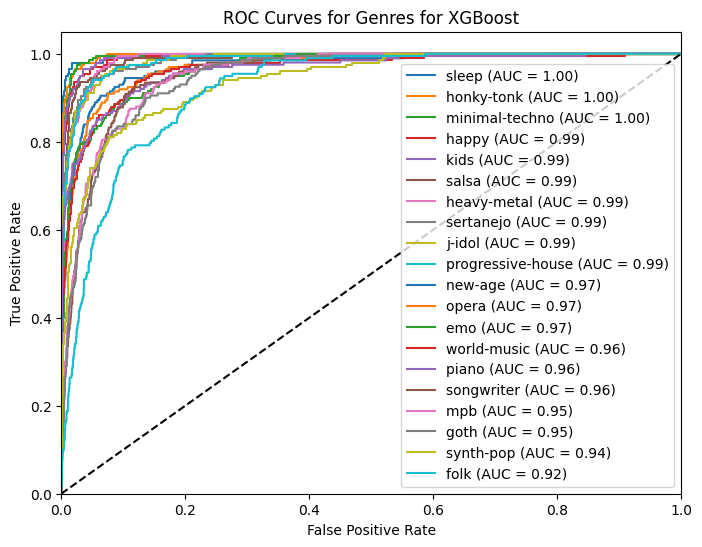

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Ottieni le probabilità predette invece delle etichette predette
y_pred_prob = best_clf.predict_proba(X_test_norm)

# Supponendo che label_encoder sia l'oggetto LabelEncoder utilizzato per codificare le etichette
class_names = label_encoder.inverse_transform(best_clf.classes_)

# Calcola le curve ROC e gli AUC per ogni classe
roc_data = []
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    roc_data.append((class_names[i], fpr, tpr, roc_auc))

# Ordina i dati ROC per valore inverso della ROC AUC (dal più alto al più basso)
roc_data_sorted = sorted(roc_data, key=lambda x: x[3], reverse=True)

# Traccia le curve ROC ordinate
plt.figure(figsize=(8, 6))
for class_name, fpr, tpr, roc_auc in roc_data_sorted:
    plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')

# Linea di riferimento casuale
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Genres for XGBoost')
plt.legend(loc="lower right")
plt.show()


In [55]:
best_params=random_search.best_params_

In [56]:
xb=XGBClassifier(**best_params, objective='multi:softprob',use_label_encoder=False, random_state=42)

In [57]:
xb.fit(X_train_norm, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.13949386065204183, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5921446485352182,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [58]:
xb.score(X_train_norm, y_train)

0.9316969050160085

In [59]:
random_search.best_score_

0.7080177306327426

## Light GBM

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report
from scipy.stats import uniform, randint
# Definire l'intervallo di iperparametri da esplorare
param_distributions = {
     'num_leaves': randint(20, 50),
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 1),
    'max_iter': randint(50, 80),
    'min_samples_leaf': randint(1, 20)
}

# Configurare RandomizedSearchCV
clf = LGBMClassifier(objective='multiclass', random_state=42)
random_search = RandomizedSearchCV(clf, param_distributions, n_iter=100, scoring='accuracy', cv=5, random_state=42, n_jobs=-1)

# Eseguire la ricerca casuale
random_search.fit(X_train, y_train)

# Stampare i migliori parametri trovati
print(f'Migliori parametri trovati: {random_search.best_params_}')

# Addestrare il modello con i migliori parametri trovati
best_clf = random_search.best_estimator_
best_clf.fit(X_train, y_train)

# Previsioni e valutazione del modello
y_pred = best_clf.predict(X_test)

y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Previsioni e valutazione del modello
print('Accuracy:', accuracy_score(y_test_labels, y_pred_labels))
print('F1-score:', f1_score(y_test_labels, y_pred_labels, average=None))
print(classification_report(y_test_labels, y_pred_labels))

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `max_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=14. Current value: min_data_in_leaf=14
[LightGBM] [Warning] num_iterations is set=74, max_iter=74 will be ignored. Current value: num_iterations=74
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=14. Current value: min_data_in_leaf=14
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2489
[LightGBM] [Info] Number of data points in the train set: 15929, number of used features: 22
[LightGBM] [Info] Start training from score -2.973936
[LightGBM] [Info] Start training from score -3.015321
[LightGBM] [Info] Start training from score -2.976396
[LightGBM] [Info] Start training from score -2.987542
[LightGBM] [Info] Star

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `max_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=14. Current value: min_data_in_leaf=14
Accuracy: 0.7233241275420538
F1-score: [0.69230769 0.43828715 0.52238806 0.87338501 0.75242718 0.89823009
 0.80788177 0.85221675 0.87139108 0.58503401 0.70754717 0.61176471
 0.69277108 0.78095238 0.81751825 0.7816092  0.92658228 0.54187192
 0.59102902 0.68085106]
                   precision    recall  f1-score   support

              emo       0.71      0.68      0.69       186
             folk       0.45      0.43      0.44       203
             goth       0.49      0.56      0.52       187
            happy       0.88      0.86      0.87       196
      heavy-metal       0.71      0.79      0.75       195
       honky-tonk       0.94      0.86      0.90       235
           j-idol       0.78      0.84      0.81       196
             kids       0.89      0.82      0.85       211
   minimal-techno       0.86      0.89      0.87      

In [ ]:
clf = LGBMClassifier(boosting_type='gbdt',  #'goss', #'dart'
                     max_depth=-1, # no limit
                     num_leaves=31,
                     n_estimators=100,
                     subsample_for_bin=200000,
                     objective='binary', #speicficare se e' bianrio il problema
                     reg_alpha=0.0, #L1 regularization term on weights
                     reg_lambda=0.0, #L2 regularization term on weights
                     random_state=42
                   )
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

## Catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report
from scipy.stats import uniform, randint

# Definizione del modello
clf = CatBoostClassifier()

# Definizione dell'intervallo di iperparametri da esplorare
param_distributions = {
    'depth': randint(1, 10),
    'learning_rate': uniform(0.01, 0.3),
    'l2_leaf_reg': uniform(0.0, 1.0),
    'iterations': randint(10, 100),
}

# Configurazione di RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_distributions, n_iter=100, scoring='accuracy', cv=5, random_state=42, n_jobs=-1)

# Esecuzione della ricerca casuale
random_search.fit(X_train, y_train)

# Stampa dei migliori parametri trovati
print(f'Migliori parametri trovati: {random_search.best_params_}')

# Addestramento del modello con i migliori parametri trovati
best_clf = random_search.best_estimator_
best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)
# Previsioni e valutazione del modello
print('Accuracy:', accuracy_score(y_test_labels, y_pred_labels))
print('F1-score:', f1_score(y_test_labels, y_pred_labels, average=None))
print(classification_report(y_test_labels, y_pred_labels))


0:	learn: 2.2615340	total: 395ms	remaining: 28s
1:	learn: 2.0192644	total: 698ms	remaining: 24.4s
2:	learn: 1.8639418	total: 972ms	remaining: 22.4s
3:	learn: 1.7379216	total: 1.24s	remaining: 21.1s
4:	learn: 1.6369016	total: 1.52s	remaining: 20.4s
5:	learn: 1.5588265	total: 1.81s	remaining: 19.9s
6:	learn: 1.4920240	total: 2.08s	remaining: 19.3s
7:	learn: 1.4304685	total: 2.35s	remaining: 18.8s
8:	learn: 1.3752162	total: 2.65s	remaining: 18.5s
9:	learn: 1.3333083	total: 2.92s	remaining: 18.1s
10:	learn: 1.2991775	total: 3.19s	remaining: 17.7s
11:	learn: 1.2699566	total: 3.47s	remaining: 17.4s
12:	learn: 1.2181832	total: 3.76s	remaining: 17.1s
13:	learn: 1.1874352	total: 4.03s	remaining: 16.7s
14:	learn: 1.1554060	total: 4.31s	remaining: 16.4s
15:	learn: 1.1289173	total: 4.59s	remaining: 16.1s
16:	learn: 1.0994486	total: 4.87s	remaining: 15.8s
17:	learn: 1.0787371	total: 5.15s	remaining: 15.4s
18:	learn: 1.0648772	total: 5.42s	remaining: 15.1s
19:	learn: 1.0478439	total: 5.82s	remaining

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
clf = CatBoostClassifier()
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))